# dtlpy.items

You can see a list of all methods below. If you want to learn about a particular method, just click it in that list.

------------------

[How to find an Item's ID](#find_item_id) | [dl.items.upload()](#upload) | [dl.items.get()](#get) | [dl.items.clone()](#clone) | [get_all_items()](#get_all_items) |[dl.items.download()](#download) | [dl.items.list()](#list) | [dl.items.make_dir()](#make_dir) | [move_items()](#move_items) |  [dl.items.set_items_entity()](#set_items_entity) | [dl.items.update()](#update) | [dl.items.update_status()](#update_status) | [dl.items.delete()](#delete) 

------------------


## Import dtlpy and log in to Dataloop

To use the `dtlpy` Python package and access Dataloop's platform, you must first import the package and log in to the platform.


In [1]:
import dtlpy as dl
dl.setenv('prod')
#Logging in to Dataloop (checks if token expired ~24h expiration time for token)
if dl.token_expired():
   dl.login()
#you can also use the simple login: 
#dl.login()

# Create and Get a Project and Dataset
Before you are able to do any operations on Items from a Dataloop Dataset, you need to create and `get()` the Dataset and Project you want to work on. To do that, you can use the line of code below, to create your own Project and Dataset:
```python
dl.projects.create(project_name='items_project') # Create the project
proj = dl.projects.get(project_name='items_project') # Get the project we created
proj.datasets.create(dataset_name='items_dataset') # create dataset as part of that project
d_set = proj.datasets.get(dataset_name='items_dataset')# then we get the Dataset from that Project
```

**Note:** Be sure to upload at least one Item to the new Dataset using [dl.items.upload](#upload).

**2nd Note:** Even if the method is `dl.items.`, we recommend that you first `get()` a Dataset inside of a variable (in this document `d_set` variable), and then use that variable `.items.`, to make sure the operations are done on the right, currently active Dataset (in our case `d_set.items.`).



In [9]:
dl.projects.create(project_name='items_project') # Create the project
proj = dl.projects.get(project_name='items_project') # Get the project we created


In [10]:
proj.datasets.create(dataset_name='items_dataset') # create dataset as part of that project
d_set = proj.datasets.get(dataset_name='items_dataset')# then we get the Dataset from that Project

## <a name="find_item_id"></a> How to find an Item's ID
The easiest way to find an Item's ID is to actually open the Items inside of the Dataset in the WebUI of Dataloop. To do that, run the code below:
```python
d_set.items.open_in_web()
```
This will open the WebUI of Dataloop, which will show all of the Items you have inside of the Dataset. By clicking one of the Items, you will see its ID. You can see that visually in the image below - the Item ID and Dataset ID are highlighted:
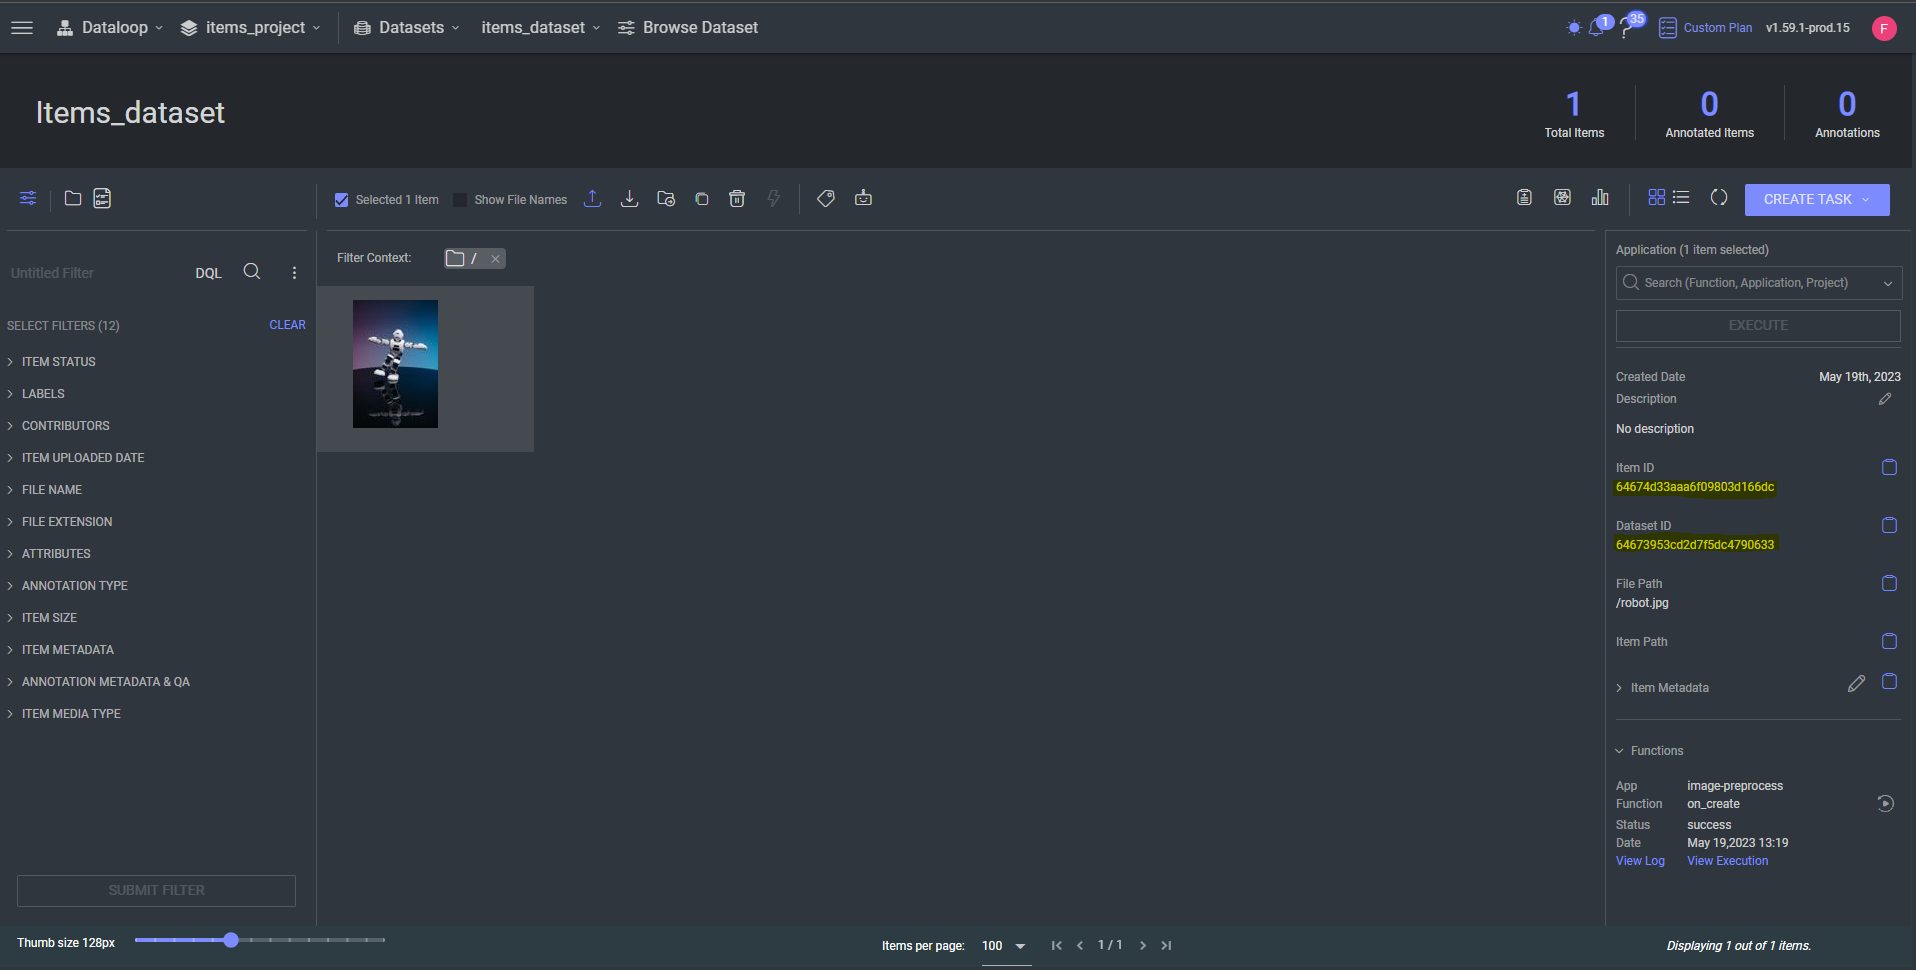

The second way in which you can do that, is to use `get_all_items()` method, which will print all of the Items available in the Dataset after executing:
```python
d_set.items.get_all_items()
```
The output should look like this, containing all of the Items from your Dataset:
```python
Iterate Entity: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]
[Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)]
```
As you can see, the ID of the items are also printed, along with their filename and the URL, which you can use in any browser, to open it in web.

In [25]:
d_set.items.open_in_web() #will open a new tab

## <a name="upload"></a> dl.items.upload()
The `dl.items.upload()` method allows you to upload new Items to your currently selected Dataset.

You can see all of the details of this function, below.

### upload()
**Definition:** `upload(local_path: str, local_annotations_path: str=None, remote_path: str="/", remote_name: str=None, file_types: list=None, overwrite: bool=False, item_metadata: dict=None, output_entity=entities.Item, no_output: bool=False, export_version: str=entities.ExportVersion.V1, item_description: str=None)`

***Uploads local file to the Dataset. Local filesystem will remain unchanged. If "*" at the end of local_path (e.g. "/images/*") Items from that folder will be uploaded. ***

**Prerequisites: Any type of User can upload Items to a Dataset.**

**param str local_path**
- list of local file, local folder, BufferIO, numpy.ndarray or url to upload

**param str local_annotations_path**
- path to Dataloop format Annotations .json files

**param str remote_path**
- remote path to save

**param str remote_name**
- remote base name to save; when upload `numpy.ndarray` as local path, remote_name with .jpg or .png extension is mandatory

**param list file_types**
- list of file type to upload. e.g ['.jpg', '.png'] (default is all)

**param dict item_metadata**
- Metadata dict to upload to Item or ExportMetadata option to export Metadata from Annotation file

**param bool overwrite**
- (optional) default = False

**param output_entity**
- output type

**param bool no_output**
- do not return the Items after upload

**param str export_version**
- exported Items will have original extension in filename, V1 - no original extension in filenames

**param str item_description**
- add a string description to the uploaded Item

**return**
- Output (generator/single Item)

**rtype**
- generator or single Item

**Example:**
```python
dataset.items.upload(local_path='local_path',
                     local_annotations_path='local_annotations_path',
                     overwrite=True,
                     item_metadata={'Hellow': 'Word'}
                     )
```

A working code for uploading an Item can be seen below (the local path is a Windows path, so you need double backslash `\\` to determine the path):
```python
d_set.items.upload(local_path='C:\\Users\\User\\Desktop\\robot.jpg',
                     overwrite=True,
                     item_metadata={'Hellow': 'Rowbot'}
                     )
```
If everything goes right, you should see a progress bar, and then the information will be printed about the new Item (including the Item's ID, which we will use), as seen below:
```python
Upload Items: 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.34s/it]
Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T09:17:42.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64673eb695f3f96ade24b307', spec=None, creator='email@gmail.com', _description=None, annotations_count=0)
```

In [26]:
d_set.items.upload(local_path='C:\\Users\\User\\Desktop\\robot.jpg',
                     overwrite=True,
                     item_metadata={'Hellow': 'Rowbot'}
                     )

Upload Items: 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.75s/it]


Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)

## <a name="get"></a> dl.items.get()
The `dl.items.get()` method allows you to get a new Item from the platform.

You can see all of the details of this function, below.

### get()

**Definition:** `get(filepath: str=None, item_id: str=None, fetch: bool=None, is_dir: bool=False) -> entities.Item`

***Gets an Item object from a Dataloop Dataset, that was previously uploaded to the platform.***

**Prerequisites:** You must be in the role of an Owner or Developer(engineer).

**param str filepath**
- (optional) search by remote path

**param str item_id**
- (optional)  search by id

**param bool fetch**
- (optional)  fetch entity from platform, default taken from cookie

**param bool is_dir**
- True if you want to get an item from dir type

**return**
- Item object

**rtype**
- dtlpy.entities.item.Item

**Example:**
```python
item1 = d_set.items.get(item_id='item_id') # we get the item, by ID
```
A working example for getting an Item from the Platform can be seen below:
```python
proj = dl.projects.get(project_name='items_project') # Get a project we created
d_set = proj.datasets.get(dataset_name='items_dataset')# we get Dataset from that Project
item1 = d_set.items.get(item_id='64673eb695f3f96ade24b307') # we get the item, by ID
```
**Note:** You can find the Item's ID after [uploading it to the platform](#upload) or you can check [How To Find an Item's ID](#find_item_id) section. 

After you get the Item you want, inside of a variable, you can print its details:
```python
print(item1)
#or
#item1.print
```
The output should be similar to what you see below:
```python
Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T09:17:42.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='email@gmail.com', _description=None, annotations_count=0)
```

In [51]:
proj = dl.projects.get(project_name='items_project') # Get a project we created
d_set = proj.datasets.get(dataset_name='items_dataset')# we get Dataset from that Project
item1 = d_set.items.get(item_id='64674d33aaa6f09803d166dc') # we get the item, by ID

In [52]:
print(item1)
#or
item1.print

Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)


<bound method BaseEntity.print of Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)>

## <a name="clone"></a> dl.items.clone()
The `dl.items.clone()` method allows you to clone an Item from the platform.

You can see all of the details of this function, below.

### clone()

**Definition:** `clone(item_id: str, dst_dataset_id: str, remote_filepath: str=None, metadata: dict=None, with_annotations: bool=True, with_metadata: bool=True, with_task_annotations_status: bool=False, allow_many: bool=False, wait: bool=True)`

***Clones (duplicates) an Item.***

**Prerequisites:** You must be in the role of an Owner or Developer(engineer).

**param str item_id**
- Item to clone

**param str dst_dataset_id**
- destination Dataset's id

**param str remote_filepath**
- complete filepath

**param dict metadata**
- new Metadata to add

**param bool with_annotations**
- clone Annotations

**param bool with_metadata**
- clone Metadata

**param bool with_task_annotations_status**
- clone Task Annotations status

**param bool allow_many**
- bool if True, using multiple clones in single Dataset is allowed, (default=False)

**param bool wait**
- wait for the command to finish

**return**
- Item object

**rtype**
- dtlpy.entities.item.Item

**Example:**
```python
dataset.items.clone(item_id='item_id',
        dst_dataset_id='dist_dataset_id',
        with_metadata=True,
        with_task_annotations_status=False,
        with_annotations=False)
```
A working code for this, where we also get the item inside a variable, can be seen below:
```python
item1_clone = d_set.items.clone(item_id='64674d33aaa6f09803d166dc',
                    dst_dataset_id='64673953cd2d7f5dc4790633',
                    with_metadata=True,
                    with_task_annotations_status=False,
                    with_annotations=False)
```
After running this code, you will see a progress bar:
```python
Command Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 53.39it/s]
```
After the progress bar is finished, you can print the details of the newly cloned Item:
```python
print(item1_clone)
```

Or, you can even open it in web:
```python
item1_clone.open_in_web()
```

In [57]:
item1_clone = d_set.items.clone(item_id='64674d33aaa6f09803d166dc',
                    dst_dataset_id='64673953cd2d7f5dc4790633',
                    with_metadata=True,
                    with_task_annotations_status=False,
                    with_annotations=False)

Command Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 63.42it/s]


In [58]:
print(item1_clone)

Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)


In [59]:
item1_clone.open_in_web()

## <a name="download"></a> dl.items.download()
The `dl.items.download()` method allows you to Download an Item from the platform.

You can see all of the details of this function, below.

### download()


**Definition:** `download(filters: entities.Filters=None, items=None, local_path: str=None, file_types: list=None, save_locally: bool=True, to_array: bool=False, annotation_options: entities.ViewAnnotationOptions=None, annotation_filters: entities.Filters=None, overwrite: bool=False, to_items_folder: bool=True, thickness: int=1, with_text: bool=False, without_relative_path=None, avoid_unnecessary_annotation_download: bool=False, include_annotations_in_output: bool=True, export_png_files: bool=False, filter_output_annotations: bool=False, alpha: float=1, export_version=entities.ExportVersion.V1)`

***Download dataset Items by Filters. Filters the dataset for items and saves them locally. Optionally it can download Annotations, Mask, Instance, and Image Mask of the Items.***

**Prerequisites:** You must be in the role of an Owner or Developer(engineer).

**param dtlpy.entities.filters.Filters filters**
- Filters entity or a dictionary containing filters parameters

**param List[dtlpy.entities.item.Item] or dtlpy.entities.item.Item items**
- download Item entity or item_id (or a list of item)

**param str local_path**
- local folder or filename to save to.

**param list file_types**
- a list of file type to download. e.g ['video/webm', 'video/mp4', 'image/jpeg', 'image/png']

**param bool save_locally**
- bool. save to disk or return a buffer

**param bool to_array**
- returns Ndarray when True and local_path = False

**param list annotation_options**
- download annotations options: list(dl.ViewAnnotationOptions)

**param dtlpy.entities.filters.Filters annotation_filters**
- Filters entity to filter annotations for download

**param bool overwrite**
- (optional) default = False

**param bool to_items_folder**
- Create 'items' folder and download items to it

**param int thickness**
- (optional) line thickness, if -1 annotation will be filled, default =1

**param bool with_text**
- (optional) add text to annotations, default = False

**param bool without_relative_path**
- bool - download items without the relative path from platform

**param bool avoid_unnecessary_annotation_download**
- default - False

**param bool include_annotations_in_output**
- default - False , if export should contain annotations

**param bool export_png_files**
- default - if True, semantic annotations should be exported as png files

**param bool filter_output_annotations**
- default - False, given an export by filter - determine if to filter out annotations

**param float alpha**
- opacity value [0 1], default 1

**param str export_version**
- exported items will have original extension in filename, V1 - no original extension in filenames

**return**
- generator of local_path per each downloaded item

**rtype**
- generator or single item

**Example:**
```python
dataset.items.download(local_path='local_path',
                     annotation_options=,
                     overwrite=False,
                     thickness=1,
                     with_text=False,
                     alpha=1,
                     save_locally=True
                     )
```
A working example of this code on our Dataset `d_set` can be seen below, where we save the Item we want to download on the Desktop:
```python
d_set.items.download(local_path='C:\\Users\\User\\Desktop\\robot.jpg',
                     overwrite=False,
                     thickness=1,
                     with_text=False,
                     alpha=1,
                     save_locally=True
                     )
```
You should see a progress bar that will show you when the download is finished, and te location where it was saved:
```python
Iterate Pages: 100%|█████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<?, ?it/s]
Download Items: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.98it/s]
'C:\\Users\\User\\Desktop\\robot.jpg'
```

In [64]:
d_set.items.download(local_path='C:\\Users\\User\\Desktop\\robot.jpg',
                     overwrite=False,
                     thickness=1,
                     with_text=False,
                     alpha=1,
                     save_locally=True
                     )

Download Items: 100%|███████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 499.98it/s]


'C:\\Users\\User\\Desktop\\robot.jpg'

## <a name="get_all_items"></a> dl.items.get_all_items()
The `dl.items.get_all_items()` method allows you to get all Items availabe in the Dataset.

You can see all of the details of this function, below.

### get_all_items()

**Definition:** `get_all_items(filters: entities.Filters=None) -> [entities.Item]`

***Get all Items from a Dataset.***

**Prerequisites:** You must be in the role of an Owner or Developer(engineer).

**param dtlpy.entities.filters.Filters filters**
- dl.Filters entity to filters items

**return**
- list of all items

**rtype**
- list

**Example:**
```python
- dataset.items.get_all_items()
```

A working example on our Dataset `d_set` can be seen below:
```python
d_set.items.get_all_items()
```
And the output should look like this:
```python
Iterate Entity: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]
[Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='email@gmail.com', _description=None, annotations_count=0)]
```

In [66]:
d_set.items.get_all_items()

Iterate Entity: 100%|████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.33it/s]


[Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)]

## <a name="list"></a> dl.items.list()
The `dl.items.list()` method allows you to list all Items in a Dataset.

You can see all of the details of this function, below.

### list()

**Definition:** `list(filters: entities.Filters=None, page_offset: int=None, page_size: int=None) -> entities.PagedEntities`

***Lists all Items from a Dataset.***

**Prerequisites:** You must be in the role of an Owner or Developer(engineer).

**param dtlpy.entities.filters.Filters filters**
- Filters entity or a dictionary containing Filters parameters

**param int page_offset**
- start page

**param int page_size**
- page size

**return**
- pages object

**rtype**
- dtlpy.entities.paged_entities.PagedEntities

**Example:**
```python
dataset.items.list(page_offset=0, page_size=100)
```
A working code based on our Dataset `d_set` can be seen below:
```python
d_set.items.list()
```
This should list all of the Items in the Dataset - only 1 Item in our Dataset:
```python
[Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)]
```

In [69]:
d_set.items.list()

PagedEntities(page_offset=0, page_size=1000, filters=<dtlpy.entities.filters.Filters object at 0x000002124DD89A50>, has_next_page=False, total_pages_count=1, items_count=1)

## <a name="make_dir"></a> dl.items.make_dir()
The `dl.items.make_dir()` method allows you to create a new directory in a Dataset of your choosing.

You can see all of the details of this function, below.

### make_dir()

**Definition:** `make_dir(directory, dataset: entities.Dataset=None) -> entities.Item`

***Creates a new directory in a Dataset.***

**Prerequisites:** All users can create a new Directory in a Dataset.

**param str directory**
- name of directory

**param dtlpy.entities.dataset.Dataset dataset**
- dataset object

**return**
- Item object

**rtype**
- dtlpy.entities.item.Item

**Example:**
```python
dataset.items.make_dir(directory='/directory_name')
```
For our `d_set` Dataset, a working code would look like this:
```python
d_set.items.make_dir(directory='/Test_Directory')
```
If the command is successful, the output will look like this:
```python
Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T12:35:18.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/Test_Directory', name='Test_Directory', type='dir', id='64676d06cc3e94a1e64aa4d7', spec=None, creator='email@gmail.com', _description=None, annotations_count=None)
```

In [72]:
d_set.items.make_dir(directory='/Test_Directory')

Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T12:35:18.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/Test_Directory', name='Test_Directory', type='dir', id='64676d06cc3e94a1e64aa4d7', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=None)

## <a name="move_items"></a> dl.items.move_items()
The `dl.items.move_items()` method allows you to move items from a directory to another, or from a Dataset to another. If the folder does not exist, it is created.

You can see all of the details of this function, below.

### move_items()

**Definition:** `move_items(destination: str, filters: entities.Filters=None, items=None, dataset: entities.Dataset=None) -> bool`

**Move items to another directory. If the directory does not exist, it will be created.**

**Prerequisites:** You must be in the role of an Owner or Developer(engineer).

**param str destination**
- destination directory

**param dtlpy.entities.filters.Filters filters**
- (optional) either this or Items; Query of Items to move

**param items**
- (optional) either this or filters; a list of Items to move

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset object

**return**
- True if success

**rtype**
- bool

**Example:**
```python
dataset.items.move_items(destination='/directory_path',items=[item1,item2,item3])
# can also do all_items = dataset.get_all_items(), and then run the command above on all_items
```
A working code on our Dataset `d_set`, which will move `item1` to the `/Test_Directory` we created earlier, looks like this.
```python
d_set.items.move_items(destination='/Test_Directory',items=[item1])
```

If the command was executed successfully, you will get a `True` output.

In [83]:
d_set.items.move_items(destination='/Test_Directory',items=[item1])

True

## <a name="open_in_web"></a> dl.items.open_in_web()
The `dl.items.open_in_web()` method allows you to open the Item of your choosing in the WebUI of Dataloop.

You can see all of the details of this function, below.

### open_in_web()

**Definition:** `open_in_web(filepath=None, item_id=None, item=None)`

***Opens the Item in the Web platform.***

**Prerequisites:** You must be in the role of an Owner or developer or be an Annotation Manager/Annotator with access to that Item through Task.

**param str filepath**
- item file path

**param str item_id**
- item id

**param dtlpy.entities.item.Item item**
- item entity

**Example:**
```python
dataset.items.open_in_web(item_id='item_id')
#or
item_variable.open_in_web()
```

In our case, let's open item1 in web:
```python
item1.open_in_web()
```
This will open your Item in a new tab:
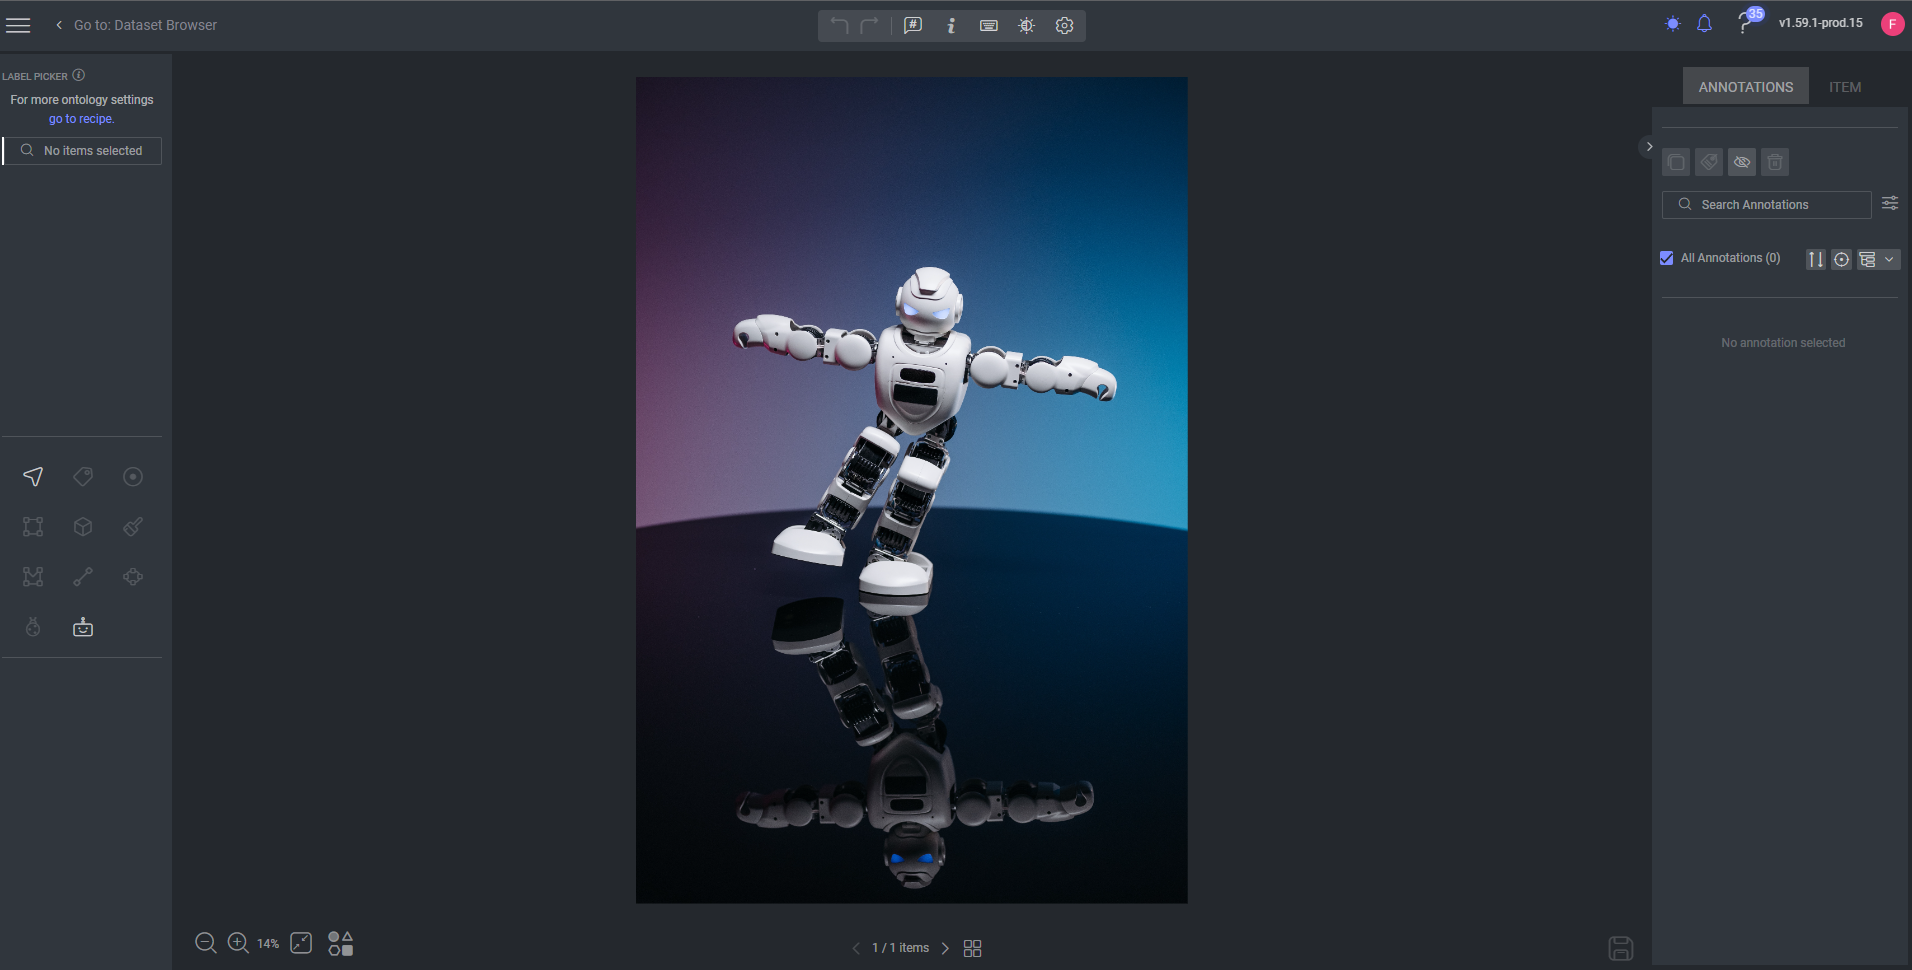

In [84]:
item1.open_in_web()

## <a name="set_items_entity"></a> dl.items.set_items_entity()
The `dl.items.set_items_entity()` method allows you to set an Item's entity type to `dl.entities.Item`, `dl.entities.Artifact`, `dl.entities.Codebase`.

You can see all of the details of this function, below.

### set_items_entity()

**Definition:** `set_items_entity(entity)`

***Set the Item entity type to Artifact, Item, or Codebase.***

**param entities.Item, entities.Artifact, entities.Codebase entity**
- entity type [dl.entities.Item, dl.entities.Artifact, dl.entities.Codebase]

**Example:**
```python
d_set.items.set_items_entity(entity=dl.entities.Artifact)
#or
d_set.items.set_items_entity(entity=dl.entities.Item)
#or
d_set.items.set_items_entity(entity=dl.entities.Codebase)
```

In [106]:
 d_set.items.set_items_entity(entity=dl.entities.Artifact)

In [108]:
 d_set.items.set_items_entity(entity=dl.entities.Item)

## <a name="update"></a> dl.items.update()
The `dl.items.update()` method allows you to Update an Item and its Metadata.

You can see all of the details of this function, below.

### update()

**Definition:** `update(item: entities.Item=None, filters: entities.Filters=None, update_values=None, system_update_values=None, system_metadata: bool=False)`

**Updates Item's Metadata.**

**Prerequisites:** You must be in the role of an Owner or Developer(engineer). You must provide at least ONE of the following params: `update_values`, `system_update_values`.

**param dtlpy.entities.item.Item item**
- Item object

**param dtlpy.entities.filters.Filters filters**
- (optional) update filtered items by given filter

**param update_values**
- (optional) field to be updated and new values

**param system_update_values**
- values in system Metadata to be updated

**param bool system_metadata**
- True, if you want to update the Metadata system

**return**
- Item object

**rtype**
- dtlpy.entities.item.Item

**Example:**
```python
dataset.items.update(item='item_entity')
```
A working example of this can be seen below, updating `item1` from the `d_set` Dataset:
```python
d_set.items.update(item1)
#or
item1 = d_set.items.update(item1)
```
The output of this will be the Item's details, after the Update:
```python
Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)
```

In [109]:
d_set.items.update(item1)

Item(dataset_url='https://gate.dataloop.ai/api/v1/datasets/64673953cd2d7f5dc4790633', created_at='2023-05-19T10:19:31.000Z', dataset_id='64673953cd2d7f5dc4790633', filename='/robot.jpg', name='robot.jpg', type='file', id='64674d33aaa6f09803d166dc', spec=None, creator='myfuncont@gmail.com', _description=None, annotations_count=0)

## <a name="update_status"></a> dl.items.update_status()
The `dl.items.update_status()` method allows you to Update an Item's Status as part of a Task.

You can see all of the details of this function, below.

### update_status()


**Definition:** `update_status(status: entities.ItemStatus, items=None, item_ids=None, filters=None, dataset=None, clear=False)`

***Updates an Item status in Task.***

**Prerequisites:** You must be in the role of an Owner or Developer or Annotation Manager who has been assigned a Task with the Item. You must provide at least ONE of the following params: `items`, `item_ids`, `filters`.

**param str status**
- ItemStatus.COMPLETED, ItemStatus.APPROVED, ItemStatus.DISCARDED

**param list items**
- list of items

**param list item_ids**
- list of items id

**param dtlpy.entities.filters.Filters filters**
- Filters entity or a dictionary containing filters parameters

**param dtlpy.entities.dataset.Dataset dataset**
- Dataset object

**param bool clear**
- to delete status

**Example:**
```python
dataset.items.update_status(item_ids='item_id', status=dl.ItemStatus.COMPLETED)
```
To test this code, we must first create a new Task:
```python
import datetime
d_set.tasks.create(task_name = 'items_task',
                    due_date = datetime.datetime(day= 1, month= 1, year= 2029).timestamp(),
                    assignee_ids =[ 'myfuncont@gmail.com'])#replace with your e-mail
```

After creating a task, you will get something similar to this - copy the `id`:
```python
Task(name='items_task', status='open', project_id='dab6c9ee-cda1-4ccf-ae25-be6d0824aee3', id='64677a92c42b89a629db9c1c', creator='myfuncont@gmail.com', due_date=1861912800000, dataset_id='64673953cd2d7f5dc4790633', spec={'type': 'annotation'}, progress=0, for_review=0, issues=0, updated_at='2023-05-19T13:33:06.207Z', created_at='2023-05-19T13:33:06.000Z', available_actions=[<dtlpy.entities.task.ItemAction object at 0x000002124D3F1330>, <dtlpy.entities.task.ItemAction object at 0x000002124D3F3B80>], total_items=1, priority=2)
```

Then we must use the Task ID to add `item1` to the Task we created:
```python
dl.tasks.add_items(items=[item1],task_id='64677a92c42b89a629db9c1c')
```

We will get this Output, where we can see `total_items=1`, meaning the Item we just added:
```python
Task(name='items_task', status='completed', project_id='dab6c9ee-cda1-4ccf-ae25-be6d0824aee3', id='64677a92c42b89a629db9c1c', creator='email@gmail.com', due_date=1861912800000, dataset_id='64673953cd2d7f5dc4790633', spec={'type': 'annotation'}, progress=1, for_review=0, issues=0, updated_at='2023-05-19T13:38:53.937Z', created_at='2023-05-19T13:33:06.000Z', available_actions=[<dtlpy.entities.task.ItemAction object at 0x000002124D3F0CA0>, <dtlpy.entities.task.ItemAction object at 0x000002124E090730>], total_items=1, priority=2)
```

We can now use the Task ID to update the status of `item1` as Completed:
```python
item1.update_status(status=dl.ItemStatus.COMPLETED,task_id='64677a92c42b89a629db9c1c')
```
We can now print the Item's Metadata, to see its status was changed to Completed:
```python
item1.metadata
```
The output will look like this, and will have `'status':'completed'` in it:
```python
{'Hellow': 'Rowbot',
 'system': {'originalname': 'robot.jpg',
  'size': 2652221,
  'encoding': '7bit',
  'taskStatusLog': [{'status': {'taskId': '64677a92c42b89a629db9c1c',
     'assignmentId': '64677a92c42b89078bdb9c1d',
     'status': 'completed',
     'creator': 'myfuncont@gmail.com',
     'timestamp': '2023-05-19T13:34:35.294Z'},
    'action': 'created'}],
  'mimetype': 'image/jpeg',
  'refs': [{'id': '64677a92c42b89a629db9c1c',
    'type': 'task',
    'metadata': {'creator': 'myfuncont@gmail.com',
     'status': 'completed',
     'timestamp': '2023-05-19T13:34:35.294Z'}},
   {'id': '64677a92c42b89078bdb9c1d',
    'type': 'assignment',
    'metadata': {'creator': 'myfuncont@gmail.com',
     'status': 'completed',
     'timestamp': '2023-05-19T13:34:35.294Z'}}],
  'isBinary': True,
  'channels': 3,
  'exif': {},
  'height': 5904,
  'thumbnailId': '6467533bb01bdb4d48677ada',
  'width': 3941}}
```

In [127]:
import datetime
d_set.tasks.create(task_name = 'items_task',
                    due_date = datetime.datetime(day= 1, month= 1, year= 2029).timestamp(),
                    assignee_ids =[ 'myfuncont@gmail.com'])

Command Progress: 100%|██████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 91.56it/s]


Task(name='items_task', status='open', project_id='dab6c9ee-cda1-4ccf-ae25-be6d0824aee3', id='64677a92c42b89a629db9c1c', creator='myfuncont@gmail.com', due_date=1861912800000, dataset_id='64673953cd2d7f5dc4790633', spec={'type': 'annotation'}, progress=0, for_review=0, issues=0, updated_at='2023-05-19T13:33:06.207Z', created_at='2023-05-19T13:33:06.000Z', available_actions=[<dtlpy.entities.task.ItemAction object at 0x000002124D3F1330>, <dtlpy.entities.task.ItemAction object at 0x000002124D3F3B80>], total_items=1, priority=2)

In [141]:
dl.tasks.add_items(items=[item1],task_id='64677a92c42b89a629db9c1c')

Command Progress: 100%|█████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 406.80it/s]


Task(name='items_task', status='completed', project_id='dab6c9ee-cda1-4ccf-ae25-be6d0824aee3', id='64677a92c42b89a629db9c1c', creator='myfuncont@gmail.com', due_date=1861912800000, dataset_id='64673953cd2d7f5dc4790633', spec={'type': 'annotation'}, progress=1, for_review=0, issues=0, updated_at='2023-05-19T13:38:53.937Z', created_at='2023-05-19T13:33:06.000Z', available_actions=[<dtlpy.entities.task.ItemAction object at 0x000002124D3F0CA0>, <dtlpy.entities.task.ItemAction object at 0x000002124E090730>], total_items=1, priority=2)

In [154]:

item1.update_status(status=dl.ItemStatus.COMPLETED,task_id='64677a92c42b89a629db9c1c')

In [156]:
item1.metadata

{'Hellow': 'Rowbot',
 'system': {'originalname': 'robot.jpg',
  'size': 2652221,
  'encoding': '7bit',
  'taskStatusLog': [{'status': {'taskId': '64677a92c42b89a629db9c1c',
     'assignmentId': '64677a92c42b89078bdb9c1d',
     'status': 'completed',
     'creator': 'myfuncont@gmail.com',
     'timestamp': '2023-05-19T13:34:35.294Z'},
    'action': 'created'}],
  'mimetype': 'image/jpeg',
  'refs': [{'id': '64677a92c42b89a629db9c1c',
    'type': 'task',
    'metadata': {'creator': 'myfuncont@gmail.com',
     'status': 'completed',
     'timestamp': '2023-05-19T13:34:35.294Z'}},
   {'id': '64677a92c42b89078bdb9c1d',
    'type': 'assignment',
    'metadata': {'creator': 'myfuncont@gmail.com',
     'status': 'completed',
     'timestamp': '2023-05-19T13:34:35.294Z'}}],
  'isBinary': True,
  'channels': 3,
  'exif': {},
  'height': 5904,
  'thumbnailId': '6467533bb01bdb4d48677ada',
  'width': 3941}}

## <a name="delete"></a> dl.items.delete()
The `dl.items.delete()` method allows you to delete an Item from the platform.

You can see all of the details of this function, below.

### delete()

**Definition:** `delete(filename: str=None, item_id: str=None, filters: entities.Filters=None)`

***Deletes an Item from platform, permanently.***

**Prerequisites:** You must be in the role of an Owner or Developer(engineer). You must provide at least ONE of the following params: `item id`, `filename`, `filters`.

**param str filename**
- (optional) search Item by remote path

**param str item_id**
- (optional)  search Item by ID

**param dtlpy.entities.filters.Filters filters**
- (optional)  delete Items by filter

**return**
- True if success

**rtype**
- bool

**Example:**
```
dataset.items.delete(item_id='item_id')
```
A working example on the Dataset `d_set` we created earlier can be seen below:
```python
d_set.items.delete(item_id='64674d33aaa6f09803d166dc')
```
This code will delete the Item we uploaded at the beginning of this document. If everything goes right, you will get a simple `True` boolean return.

In [157]:
d_set.items.delete(item_id='64674d33aaa6f09803d166dc')

True

-------------------------
## Final Words

Dataloop has a lot of resources that can help you learn about the services we offer. However, it may be challenging to have a comprehensive understanding of the location of all resources or to locate something particular that you need. That's why we took care of organising all of them. 

Below, you will find links to a **mindmap** showing all of the resources available - each element is clickable and will redirect you to that resource. You will also find other Documentation pages and their descriptions, so you know where to look, and what you'll find.

1. [Dataloop's Developer Mindmap](https://gitmind.com/app/docs/m7u63dss) - a visual representation of all the resources available for developers.
2. [Dataloop's Developer Documentation on Redocly](https://developers.dataloop.ai/tutorials/tutorials/) - here you will find a [Beginner Onboarding](https://developers.dataloop.ai/onboarding/onboarding/) which will walk you throught the basics of using Dataloop's platform from the Python SDK, and also an [Advanced Onboarding Exercise](https://developers.dataloop.ai/onboarding/11_onboarding_exercise/) which will show you how to use the platform on a more complicated usecase; [you can also find them on GitHub](https://github.com/dataloop-ai/dtlpy-documentation), if that's your thing.
3. [Dataloop's Main GitHub Repository](https://github.com/dataloop-ai) - this repository contains the main dtlpy package, along with its documentation and other resources; this is meant to be a "clean" space containing the critical elements of Dataloop.
4. [Dataloop's Developer GitHub Repository](https://github.com/dataloop-ai-apps) - this repository contains resources, exercises, examples, documentations, etc. - it's  a Developer Community, which offers resources  from which developers can learn about the platform, ask questions, and find useful code and guides that will solve their problems. 
5. [Dataloop's API Documentation](https://github.com/dataloop-ai-apps/dataloop-api-documentation) - this documentation is a beginner's guide to how to use Dataloop's Rest APIAPI ([click here to open the Swagger UI API page](https://gate.dataloop.ai/api/v1/docs/#/)); it will walk you through what API's are in general, what Dataloop's API is, how it helps you, why you should use it and teaches you **how** to use it. You can also [find a "Glossary" of all API commands here](https://github.com/dataloop-ai-apps/dataloop-api-documentation/blob/main/02_swagger_ui_api_guide.md).
6. [Dataloop's WebUI Version](https://console.dataloop.ai/welcome) - remember that you can always use (and should use) the WebUI version of Dataloop; some things are easier to do on the WebUI version, while others are easier to do in the PythonSDK version - so be sure to use both.

Finally, if you have any troubles in your journey to learn and use Dataloop, you can always contact us for help by clicking the small e-mail button located at the bottom right of the [main Dataloop web page](https://dataloop.ai/), or even [book a demo so we can walk you through how to use Dataloop](https://dataloop.ai/#talkToAnExpert).
